# Параметрические критерии

## Задание 1

Существуют две версии одновыборочного Z-критерия для доли, отличающихся формулами для статистики. Одна из этих версий более точная, поэтому мы говорили только о ней, а вторую не обсуждали вообще. Какую из этих двух версий одновыборочных Z-критериев для доли мы проходили?

Ответ:
Версия множителей Лагранжа со статистикой $Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$

## Задание 2

Z-критерий для двух долей в связанных выборках использует только информацию о:

Отвтет: количестве несовпадающих пар значений признаков — $(0,1)$ и $(1,0)$, и объёме выборок $n$.

## Задание 3

В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

## Решение

Применим Z-критерий для доли двух независимых выборок
$Z = \frac{\hat{p_1}-\hat{p_2}}{\sqrt{P(1-P)(\frac{1}{n_1}+\frac{1}{n_2})}}$, где $P = \frac{\hat{p_1}n_1 + \hat{p_2}n_2}{n_1 + n_2}$

In [1]:
n1 = 34
s1 = 10

n2 = 16
s2 =4

p1 = s1/n1
p2 = s2/n2
P = (p1*n1+p2*n2)/(n1+n2)

Z = (p1-p2)/((P*(1-P)*(1/n1+1/n2))**0.5)
Z

0.32410186177608225

In [2]:
import scipy.stats
import numpy as np
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [3]:
print(np.round(proportions_diff_z_test(Z, 'greater'), 4))

0.3729


## Задание 4

Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. На рисунке ниже показаны измеренные признаки:

Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте `random_state = 1`). На оставшихся 150 настройте два классификатора поддельности банкнот:

1. логистическая регрессия по признакам $X_1,X_2,X_3$;
2. логистическая регрессия по признакам $X_4,X_5,X_6$.

Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили $5.5×10^{−8}$, нужно ввести 8).

Ответ:

Используем Z-критерий для двух связанных выборок. ( так как данные одни и те же, просто два разных эксперимента )

$Z=\frac{f-g}{\sqrt{f+g-\frac{(f-g)^2}{n}}}$

Далее предсказываем целевую переменную для каждого классификатора.

Получаем вектора (predicted == target) и считаем по ним Z-статистику а потом и уровень значимости.

`0.0032969384555543435` - номер первая значащей цифры 3

In [4]:
import pandas as pd
banknotes = pd.read_csv("banknotes.txt", delimiter="\t")
X = banknotes.drop(['real'],axis=1)
y = banknotes['real']
print(banknotes.shape)
banknotes.head()

(200, 7)


,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score as roc_auc
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=50)

def fit_predict(X_train, y_train, X_test, columns=[]):
    X_train_ = X_train[columns]
    X_test_ = X_test[columns]
    clf = LogisticRegression()
    clf.fit(X_train_, y_train)
    return clf.predict(X_test_)

In [6]:
pred_1 = fit_predict(X_train, y_train, X_test, ['X1', 'X2', 'X3'])
accuracy_score(y_test, pred_1)

0.80000000000000004

In [7]:
pred_2 = fit_predict(X_train, y_train, X_test, ['X4', 'X5', 'X6'])
accuracy_score(y_test, pred_2)

0.97999999999999998

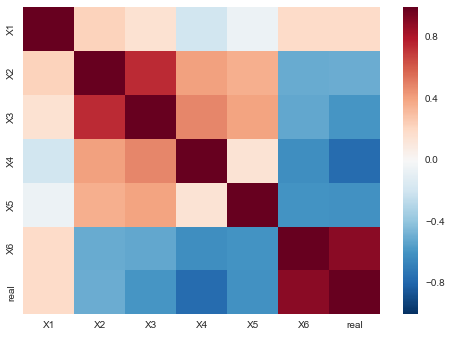

In [8]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.heatmap(banknotes.corr())

In [9]:
def conjugation_matrix(x1, x2):
    if x1.size != x2.size:
        raise ValueError("Array sizes should match but {} and {}".format(x1.size, x2.size))

    n = x1.size
    e = np.sum((x1 == True) & (x2 == True))
    h = np.sum((x1 == False) & (x2 == False))
    f = np.sum((x1 == True) & (x2 == False))
    g = np.sum((x1 == False) & (x2 == True))
    
    return e,f,g,h,n

In [10]:
def z_stat(f, g, n):
    return (f-g) / np.sqrt(f+g-((f-g)**2 / n))

In [11]:
accuracy_1=(pred_1==y_test)
accuracy_2=(pred_2==y_test)
e,f,g,h,n = conjugation_matrix(accuracy_1, accuracy_2)
print(e,f,g,h,n)
print(z_stat(f,g,n))
proportions_diff_z_test(z_stat(f,g,n))

39 1 10 0 50
-2.93860416802


0.0032969384555543435

## Задание 5

В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

Ответ: -0.0599

In [12]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [13]:
interval = proportions_diff_confint_rel(accuracy_1, accuracy_2)
print(np.round(interval,4))

[-0.3001 -0.0599]


## Задание 6

Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

Z-критерий

$Z = \frac{\bar{X} - \mu_0}{\sigma/\sqrt{n}}$

Ответ: 0.0505

In [14]:
def z_criterion(x,µ,σ,n):
    return (x - µ) / (σ / n**0.5)

z = z_criterion(541.4, 525, 100, 100)
print(z)
print(np.round(proportions_diff_z_test(z, 'greater'), 4))

1.6399999999999977
0.0505


## Задание 7

Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [16]:
z2 = z_criterion(541.5, 525, 100, 100)
print(z2)
print(np.round(proportions_diff_z_test(z2, 'greater'), 4))

1.65
0.0495
